In [1]:
%pylab inline
import snrlightcurve_testexpindex as snrtest
params = {'axes.linewidth':1.5,'lines.linewidth':1.3,'xtick.labelsize':15,'ytick.labelsize':15,\
          'xtick.major.size':7,'xtick.major.width':2,'ytick.major.size':7,'ytick.major.width':2,\
          'xtick.minor.size':4,'xtick.minor.width':1.5,'ytick.minor.size':4,'ytick.minor.width':1.5}
plt.rcParams.update(params)
plt.rcParams.update({'figure.autolayout': True})

Populating the interactive namespace from numpy and matplotlib


Remember to use the upper limit and fluxes at the same frequency. You're using $3\sigma = 3\times2.7 \mu$Jy at 4.86 GHz for SN1885a, and $0.437 \pm 0.022$ Jy for G1.9 (Green 2008)

In [29]:
def lumFluxlimit(fluxLim, beamSize, diam, dist=0.84):
    lum = lambda x: 1.0e24*1.2*x*dist*dist  #x is radio flux in mJy
    whPoint = np.where(diam<=beamSize)[0]
    lumPoint = np.ones(whPoint.size)*lum(fluxLim)
    
    whExtend = np.where(diam>beamSize)[0]
    numBeams =(diam[whExtend]/beamSize)**2.#np.pi*((diam/(*beamSize))**2)
    fluxExtend = fluxLim*np.sqrt(numBeams)
    lumExtend = lum(fluxExtend)
    
   # print lumPoint.size, lumExtend.size
    return np.concatenate((lumPoint, lumExtend))


def flux_to_lum(flux, fluxerr, dist, e_dist): #Here flux is in Jy
    lum = 1.0e24*1.2*(flux*1.0e3)*dist*dist
    lumerr = 1.0e24*np.sqrt((2.4*(flux*1.0e3)*dist*e_dist)**2.0 + (1.2*dist*dist*(fluxerr*1.0e3))**2.0)
    return (lum, lumerr)

In [41]:
print 'Luminosity [ergs/s/Hz] of G1.9+0.3 = ', flux_to_lum(.366, 0.0, 8.5e-3, 0.)

Luminosity [ergs/s/Hz] of G1.9+0.3 =  (3.17322e+22, 0.0)


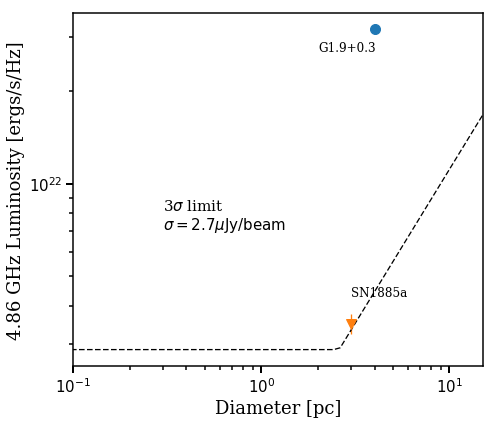

In [40]:
g19_lum1, g19_lum1_err = flux_to_lum(0.366, 0.0, 8.5e-3, 0.)
sn1885_lum, sn1885_lum_err = flux_to_lum(3.0*1.58*1.0e-6, 0., 0.785, 0.03)

diams = np.linspace(0,20, 100) #Diameters in parsecs
lums_corr = lumFluxlimit(fluxLim=3.0*0.0013, beamSize=3.81*0.68, diam=diams, dist=0.785)
plt.figure(figsize=(7,6))
plt.rc('font', family='serif')
plt.text(2, 2.7e22, 'G1.9+0.3', fontsize=12)
plt.text(3, 4.3e21, 'SN1885a', fontsize=12)
plt.text(.3, 7.0e21, r'3$\sigma$ limit'+'\n'+r'$\sigma=2.7 \mu\rm{Jy/beam}$', fontsize=15)
plt.plot(diams, lums_corr, 'k--')
plt.xlabel('Diameter [pc]', fontsize=18)
plt.ylabel('4.86 GHz Luminosity [ergs/s/Hz]', fontsize=18)
plt.errorbar([4.0], [g19_lum1], yerr=[g19_lum1_err], fmt='o', ms=10, capsize=0)
plt.errorbar([3.0], [sn1885_lum], yerr=[sn1885_lum_err], fmt='v', ms=10, capsize=0)
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.1, 15)
plt.show()

In [18]:
wh = np.where(diams>=4.0)
print lums_corr[40]
print g19_lum1

6.35192555476e+21
3.78879e+22


In [7]:
from astropy import units
lum = lambda f, d: f*(4.0*np.pi*d*d)
mJy = 1.0e-3*units.astrophys.Jy
flux = 0.93*1.0e3*mJy
dist = 0.0085*(1.0e6*units.parsec).to(units.m)
l = lum(flux, dist).to(units.W/units.Hz)
print 'Luminosity in ergs/s/Hz = ',l*1.0e7

Luminosity in ergs/s/Hz =  8.03955025733e+22 W / Hz


In [23]:
flux = lambda lum, d: lum/(4.0*np.pi*d*d)
mJy = 1.0e-3*units.astrophys.Jy
flux = 0.0114*mJy
dist = 0.785*(1.0e6*units.parsec).to(units.m)
l = lum(flux, dist).to(units.W/units.Hz)
print 'Luminosity in ergs/s/Hz = ',l*1.0e7

<Quantity 1.195888610778214e+24 W / Hz>

In [26]:
fluxsn1885 = 0.00158*3.0 #mJy, Chomiuk's upper limit from document
dist = 0.785 #McConnachie 2005 - http://adsabs.harvard.edu/abs/2005MNRAS.356..979M
e_dist = 0.025
lumsn1885 = 1.0e24*1.2*fluxsn1885*dist*dist
print lumsn1885

3.5050878e+21


In [6]:
0.0114*9.64

0.10989600000000001